# Your First RNN

**Exercise objectives**:

- Better understand temporal data
- Build your first Recurrent Neural Network


<hr>
<hr>

## 1. The data

Let's start with simple sequences of observations:

In [1]:
from tensorflow import keras
import numpy as np

In [2]:
#Load the files X.sav and Y.sav and store them in two arrays X and y
import pickle

# Load X.sav
with open('X.sav', 'rb') as f:
    X = pickle.load(f)

# Load Y.sav
with open('Y.sav', 'rb') as f:
    y = pickle.load(f)

In [3]:
print(X.shape)
print(X[0])

(25000, 10, 3)
[[  1.436 113.    197.   ]
 [  1.725 116.    197.   ]
 [  2.144 116.    197.   ]
 [  2.202 116.    197.   ]
 [  2.341 116.    166.   ]
 [  2.449 143.    166.   ]
 [  6.088 143.    108.   ]
 [  6.169 107.    108.   ]
 [  2.656 107.    108.   ]
 [  2.848 107.    108.   ]]


In [4]:
print(y.shape)
print(y[0])

(25000,)
2.872


☝️ The data describes the evolution of the **employment status of a person, year after year**: each sequence corresponds to 10 consecutive years, where each year describes a job situation, comprising of 3 components
- the salary,
- the number of persons under one's responsability,
- the size of the company. 

So, from this 25000 sequences, each of 10 consecutive observations, the goal is to predict the salary on the 11th year based on the past observations. 

❓ **Question** ❓ Take some sequences and plot the evolution of their salaries, of the persons under their responsibility and of the company sizes. You might see some correlation between the three variables.

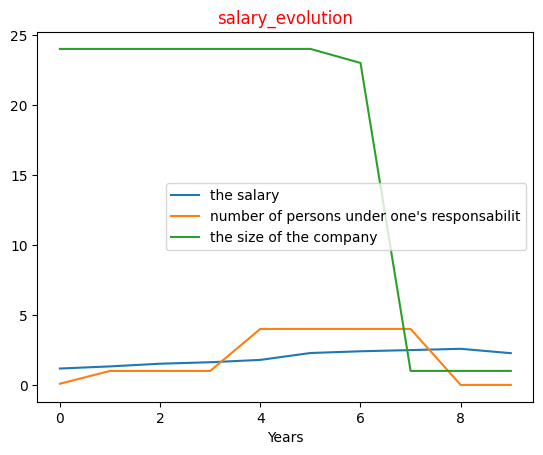

In [5]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

plt.subplot()
plt.plot(X[1])
plt.title("salary_evolution", c="r")
plt.xlabel("Years")
plt.legend(['the salary', "number of persons under one's responsabilit", 'the size of the company'])
plt.show()

❓ **Question** ❓ Plot the distribution of all the salaries, persons under one's responsibility, and company sizes to get a better understanding of the variability of observations

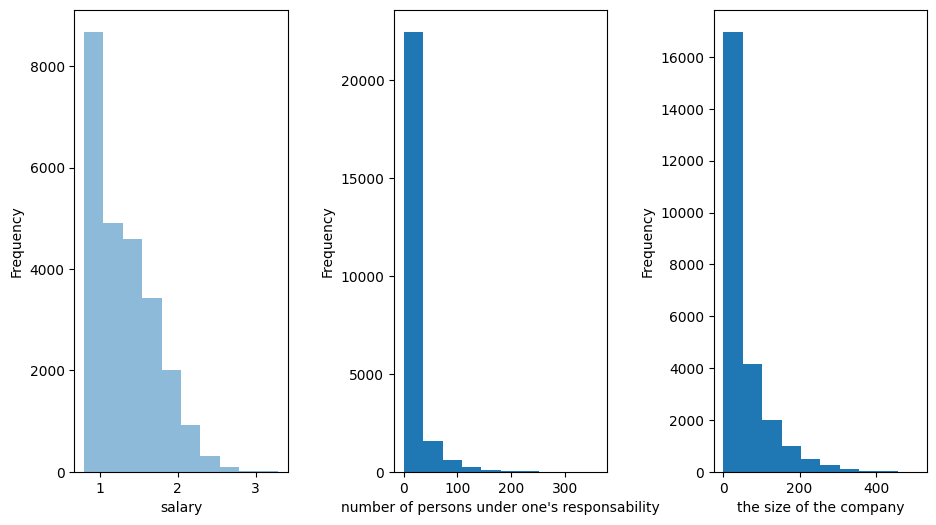

In [6]:
# YOUR CODE HERE
fig, axs = plt.subplots(1, 3, figsize=(11,6))
plt.subplots_adjust(wspace=0.5)

axs[0].hist(X[:,0, 0], bins=10, alpha=0.5);
axs[0].set_xlabel("salary");
axs[0].set_ylabel("Frequency");

axs[1].hist(X[:,0, 1], bins=10);
axs[1].set_xlabel("number of persons under one's responsability");
axs[1].set_ylabel("Frequency");

axs[2].hist(X[:,0, 2], bins=10);
axs[2].set_ylabel("Frequency");
axs[2].set_xlabel('the size of the company');

❓ **Question** ❓  Split your dataset between a train and test set (20/80%)

In [7]:
# YOUR CODE HERE
# np.flatten(order='C')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# 2. A Simple RNN

Now, you will create your first Recurrent Neural Network. Let's start simple

❓ **Question** ❓ Write a model that has: 
- a `Normalization` layer adapted on the training set
- a `SimpleRNN` layer with 20 `units` - don't forget to choose the `tanh` activation function
- a Dense layer with 10 neurons
- a last Dense layer specific to your task (predict a salary)

Remember, you don't need to specify an `input_shape`: as soon as your normalizer has been adapted to your train set, it has memorized it.

In [9]:
!pip install --upgrade keras


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from keras import layers

In [11]:
# from keras.layers.experimental.preprocessing import Normalization
from keras.layers import Normalization
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Flatten
from keras import layers

# YOUR CODE HERE
model = Sequential()


model.add(layers.Normalization(axis=-1, mean=None, variance=None, invert=False))
model.add(layers.SimpleRNN(units=20,activation='tanh', input_shape=(10, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='linear'))

# the complitaion
model.compile(loss='mse', optimizer='adam') #recomanded optimizer for RNN
# the fit
model.fit(X,y, batch_size=16, epochs=10)
# prediction
model.predict(X_test)

Epoch 1/10
1563/1563 [==============================] - 5s 2ms/step - loss: 18.9252
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 6.4333
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 4.1037
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 3.2062
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.6489
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.4339
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.1365
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9326
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9426
Epoch 10/10
157/157 [==============================] - 0s 1ms/step


array([[ 2.9190695,  2.890295 ,  2.8870587, ...,  2.9246845,  2.9369986,
         2.8722496],
       [ 3.6160212,  3.584128 ,  3.5837703, ...,  3.62363  ,  3.6333952,
         3.5664258],
       [ 9.395268 ,  9.306908 ,  9.423385 , ...,  9.404226 ,  9.356829 ,
         9.35313  ],
       ...,
       [19.768667 , 19.946558 , 19.541878 , ..., 19.590637 , 19.759216 ,
        19.841284 ],
       [10.651278 , 10.59105  , 10.706781 , ..., 10.710965 , 10.648333 ,
        10.626712 ],
       [ 3.0540683,  3.0246556,  3.0219316, ...,  3.060158 ,  3.072176 ,
         3.0065656]], dtype=float32)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10, 3)            7         
 n)                                                              
                                                                 
 simple_rnn (SimpleRNN)      (None, 20)                480       
                                                                 
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
Total params: 697
Trainable params: 690
Non-trainable params: 7
_________________________________________________________________


❓ **Question** ❓ Compute the number of trainable parameters of your model using `model.summary`. 

Then, try to recompute them by hand

💡 Hints: 
- Your `normalization` layer has 7 non-trainable params, which comprise of the mean and standard deviation of each 3 features (salary, persons under responsibility, company size) plus one bias set to 0

- If $\color{green}{n_h}$ RNN units are applied in parallel to $\color{red}{n_x}$ features, the layer has $\color{green}{n_h}(\color{green}{n_h} + \color{red}{n_x} + 1)$ parameters to train. Notice how this number is *independent* of the length of each sequences (here 10 days)


In [13]:
X_test.shape

(5000, 10, 3)

In [14]:
# YOUR CODE HERE
nh=20
nx=3
compte=nh*(nh+nx+1)
compte

480

❓ **Question** ❓ Compile your model. Remember to first use the `rmsprop` optimizer (instead of Adam).

In [15]:
# YOUR CODE HERE
# YOUR CODE HERE
model = Sequential()

model.add(layers.Normalization(axis=-1, mean=None, variance=None, invert=False))
model.add(layers.SimpleRNN(units=20,activation='tanh', input_shape=(10, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='linear'))

# the complitaion
model.compile(loss='mse', optimizer='rmsprop') #recomanded optimizer for RNN
# the fit
model.fit(X,y, batch_size=16, epochs=10)
# prediction
model.predict(X_test)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 16.8719
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 4.3696
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.9665
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.5034
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2507
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0672
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9212
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8338
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7832
Epoch 10/10
157/157 [==============================] - 0s 1ms/step


array([[ 2.381161 ,  2.382095 ,  2.3879898, ...,  2.375828 ,  2.3725898,
         2.3808973],
       [ 3.1329207,  3.137845 ,  3.145865 , ...,  3.1273596,  3.129942 ,
         3.1407428],
       [ 9.50144  ,  9.505115 ,  9.515276 , ...,  9.499799 ,  9.51529  ,
         9.528125 ],
       ...,
       [21.819096 , 21.921011 , 21.81557  , ..., 21.820658 , 21.725048 ,
        21.847345 ],
       [10.5251   , 10.47614  , 10.507844 , ..., 10.488938 , 10.5049715,
        10.512918 ],
       [ 2.5171397,  2.5221179,  2.5303354, ...,  2.5112777,  2.5089574,
         2.521789 ]], dtype=float32)

❓ **Question** ❓ Run your model on your data. Use a validation split of 20% and an early stopping criterion (patience=5). Evaluate your performance on the test set

In [16]:
# YOUR CODE HERE
from keras.callbacks import EarlyStopping
model = Sequential()

model.add(layers.Normalization(axis=-1, mean=None, variance=None, invert=False))
model.add(layers.SimpleRNN(units=20,activation='tanh', input_shape=(10, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='linear'))

# the complitaion
model.compile(loss='mae', optimizer='rmsprop') #recomanded optimizer for RNN
es = EarlyStopping(patience=5, verbose=2)
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=[es])
# prediction
model.predict(X_test)

Epoch 1/15
625/625 [==============================] - 2s 3ms/step - loss: 2.7338 - val_loss: 1.7535
Epoch 2/15
625/625 [==============================] - 1s 2ms/step - loss: 1.4008 - val_loss: 1.1357
Epoch 3/15
625/625 [==============================] - 1s 2ms/step - loss: 1.0058 - val_loss: 0.8589
Epoch 4/15
625/625 [==============================] - 1s 2ms/step - loss: 0.8344 - val_loss: 0.8448
Epoch 5/15
625/625 [==============================] - 1s 2ms/step - loss: 0.7397 - val_loss: 0.7235
Epoch 6/15
625/625 [==============================] - 1s 2ms/step - loss: 0.6878 - val_loss: 0.6280
Epoch 7/15
625/625 [==============================] - 1s 2ms/step - loss: 0.6487 - val_loss: 0.5983
Epoch 8/15
625/625 [==============================] - 1s 2ms/step - loss: 0.6176 - val_loss: 0.5314
Epoch 9/15
625/625 [==============================] - 1s 2ms/step - loss: 0.5914 - val_loss: 0.5557
Epoch 10/15
625/625 [==============================] - 1s 2ms/step - loss: 0.5714 - val_loss: 0.6147

array([[ 2.5150547,  2.5206847,  2.520423 , ...,  2.5222516,  2.50912  ,
         2.5183408],
       [ 3.439877 ,  3.4486582,  3.4752421, ...,  3.4528563,  3.4664016,
         3.4374056],
       [10.17615  , 10.174445 , 10.07361  , ..., 10.133764 , 10.147803 ,
        10.140632 ],
       ...,
       [21.176266 , 21.02932  , 20.80475  , ..., 20.659306 , 20.735909 ,
        21.224756 ],
       [11.079042 , 10.976016 , 10.950376 , ..., 11.044256 , 11.122267 ,
        11.016519 ],
       [ 2.7194765,  2.7149496,  2.709333 , ...,  2.7242215,  2.701881 ,
         2.723747 ]], dtype=float32)

# Baseline comparison?


In the case of a usual regression model, a baseline prediction for `y_test` could be to predict the average of `y_train`.

With temporal data, it often happens that you try to predict a value that you have already seen in the past: here, the salary. In that case, a baseline model could be to predict for instance that the 11-th salary is equal to the 10-th salary.

❓ **Question** ❓ Compute the Mean Absolute Error of a model that would predict that the salary remains constant between the 10-th and 11-th year and compare it to your RNN.

In [17]:
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_error

y_pred_const = np.repeat(y_train[-1], len(y_test)) # Predict the last salary in the training set for all test examples
mae_baseline = mean_absolute_error(y_test, y_pred_const)
print("MAE of baseline model:", mae_baseline)

MAE of baseline model: 3.6935542000000003


You have probably seen that your prediction is a little bit better than the baseline model

# LSTM

❓ **Question** ❓ Write the exact same model, but with a `LSTM` instead of a `SimpleRNN` and evaluate your performance on the test set

In [18]:
# YOUR CODE HERE
from keras.layers import LSTM

model = Sequential()

model.add(layers.Normalization(axis=-1, mean=None, variance=None, invert=False))
model.add(layers.LSTM(units=20,activation='tanh', input_shape=(10, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='linear'))

# the complitaion
model.compile(loss='mae', optimizer='rmsprop') #recomanded optimizer for RNN
es = EarlyStopping(patience=5, verbose=2)
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=[es])
# prediction
model.predict(X_test)

Epoch 1/15
625/625 [==============================] - 4s 4ms/step - loss: 2.6699 - val_loss: 1.5895
Epoch 2/15
625/625 [==============================] - 2s 3ms/step - loss: 1.2846 - val_loss: 0.9792
Epoch 3/15
625/625 [==============================] - 2s 4ms/step - loss: 0.9240 - val_loss: 0.7670
Epoch 4/15
625/625 [==============================] - 2s 3ms/step - loss: 0.7632 - val_loss: 0.6455
Epoch 5/15
625/625 [==============================] - 2s 3ms/step - loss: 0.6819 - val_loss: 0.5844
Epoch 6/15
625/625 [==============================] - 2s 3ms/step - loss: 0.6314 - val_loss: 0.6539
Epoch 7/15
625/625 [==============================] - 2s 3ms/step - loss: 0.5888 - val_loss: 0.5950
Epoch 8/15
625/625 [==============================] - 2s 3ms/step - loss: 0.5606 - val_loss: 0.4949
Epoch 9/15
625/625 [==============================] - 2s 3ms/step - loss: 0.5293 - val_loss: 0.4325
Epoch 10/15
625/625 [==============================] - 2s 3ms/step - loss: 0.5118 - val_loss: 0.4435

array([[ 2.4014087,  2.4154632,  2.385926 , ...,  2.3871708,  2.4004095,
         2.3977015],
       [ 3.3417168,  3.3325233,  3.3290977, ...,  3.3302448,  3.328199 ,
         3.3189414],
       [ 9.3469   ,  9.342995 ,  9.309476 , ...,  9.3481865,  9.351078 ,
         9.330158 ],
       ...,
       [18.202026 , 18.259745 , 18.138447 , ..., 18.03034  , 18.165869 ,
        18.31012  ],
       [10.277045 , 10.165286 , 10.310825 , ..., 10.263851 , 10.27146  ,
        10.36251  ],
       [ 2.5433989,  2.5465844,  2.5341392, ...,  2.5351315,  2.5429673,
         2.5351331]], dtype=float32)

## 🏁 Congratulation

You now know how to run RNN on sequence data!

Note: The sequences you worked with are totally fake. In case you need to train and reproduce similar data, you can find bellow the functions that have been used to simulate this data.

# Utils (for reference only)

In [19]:
def create_sequences(number):
    X, y = [], []
    
    for i in range(number):
        x_i, y_i = create_individual_sequence(10)
        X.append(x_i)
        y.append(y_i)
        
    return np.array(X), np.array(y)
            
def create_individual_sequence(length):
    company_sizes = []
    nb_persons = []
    salaries = []
    
    
    # Education level
    educ_level = [max(0, int(np.random.normal(10, 2)))]*length
    
    # Company size
    current_size = int(1 + np.random.beta(.4, 4)*500)
    for i in range(length):
        if not np.random.randint(4): # Change 1 out of 3 possibilities 
            current_size = int(max(1, np.random.normal(current_size, 50)))
        company_sizes.append(current_size)
    
    # Number of persons
    nb_iter = np.random.beta(.15, 4)*300
    for i in range(length):
        if not np.random.randint(2): # Change 1 out of 2 possibilities
            R_1 = np.random.beta(0.5, 8)*3
            nb_iter = nb_iter + max(-2, R_1*company_sizes[i] + np.random.randint(-2, 2))
            nb_iter = max(0, nb_iter)
            nb_iter = int(min(company_sizes[i]-1, nb_iter))
        nb_persons.append(nb_iter)
        
    
    # Salary
    salary_iter = max(800, int(np.random.normal(1200, 300)+ 0.05*company_sizes[0] +  np.random.normal(40, 400)))
    salaries.append(salary_iter)
    for i in range(1, length + 1):
        R_1 = np.random.normal(100, 50)
        change_person = nb_persons[i-1] - nb_persons[i-2]
        change_company = max(0, company_sizes[i-1] - company_sizes[i-2])
        salary_iter = salary_iter + 0.05*change_company + change_person*R_1 + np.random.normal(100, 50)
        salary_iter = max(int(salary_iter), 500)
        
        salaries.append(salary_iter)

    y = salaries[-1]/1000
    salaries = [_/1000 for _ in salaries[:-1]]
    
    return np.array([salaries, nb_persons, company_sizes]).T, y

In [20]:
#X, y = create_sequences(25000)

#np.save('X', X.astype(np.float32))
#np.save('y', y)